In [1]:
# !pip install -U git+https://github.com/openfisca/openfisca-ceq.git@master#egg=OpenFisca-CEQ
# !pip install -U git+https://github.com/openfisca/openfisca-senegal.git@ceq#egg=OpenFisca-Senegal
# !pip install -U git+https://github.com/openfisca/openfisca-mali.git@master#egg=OpenFisca-Mali
# !pip install -U git+https://github.com/openfisca/openfisca-cote-d-ivoire.git@master#egg=OpenFisca-COTE-D-IVOIRE

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from openfisca_ceq.tools.survey_scenario import build_ceq_survey_scenario
from openfisca_ceq.tools.indirect_taxation.tax_benefit_system_indirect_taxation_completion import indirect_tax_by_country
from openfisca_ceq.tools.data import year_by_country
from openfisca_ceq.tools.data_ceq_correspondence import (
    ceq_input_by_harmonized_variable,
    ceq_intermediate_by_harmonized_variable,
    non_ceq_input_by_harmonized_variable,
    )

# Build country scenario

## Country selection

In [3]:
country = "mali"

In [4]:
# Parameters
country = "mali"


In [5]:
year = year_by_country[country]
survey_scenario = build_ceq_survey_scenario(legislation_country = country, year = year)

# Aggegates check

## Income variables

### Disagregated income variables

In [6]:
ceq_by_harmonized_variable = dict()
ceq_by_harmonized_variable.update(ceq_input_by_harmonized_variable)
ceq_by_harmonized_variable.update(ceq_intermediate_by_harmonized_variable)
ceq_by_harmonized_variable.update(non_ceq_input_by_harmonized_variable)
ceq_by_harmonized_variable['autres_revenus_du_capital_brut'] = 'autres_revenus_du_capital_brut'
ceq_by_harmonized_variable['pension_retraite_brut'] = 'pension_retraite_brut'
ceq_by_harmonized_variable['revenu_foncier_brut'] = 'revenu_foncier_brut'
ceq_by_harmonized_variable['revenu_non_salarie_brut'] = 'revenu_non_salarie_brut' 
ceq_by_harmonized_variable['salaire_brut'] = 'salaire_brut'
ceq_by_harmonized_variable['salaire_super_brut'] = 'salaire_super_brut'
ceq_by_harmonized_variable

{'rev_i_autoconsommation': 'autoconsumption',
 'rev_i_autres': 'other_income',
 'rev_i_autres_transferts': 'gifts_sales_durables',
 'rev_i_loyers_imputes': 'imputed_rent',
 'rev_i_transferts_publics': 'direct_transfers',
 'rev_i_agricoles': 'revenu_agricole',
 'rev_i_autres_revenus_capital': 'autres_revenus_du_capital',
 'rev_i_independants_Ntaxe': 'revenu_informel_non_salarie',
 'rev_i_independants_taxe': 'revenu_non_salarie',
 'rev_i_locatifs': 'revenu_locatif',
 'rev_i_pensions': 'pension_retraite',
 'rev_i_salaires_formels': 'salaire',
 'rev_i_salaires_informels': 'revenu_informel_salarie',
 'autres_revenus_du_capital_brut': 'autres_revenus_du_capital_brut',
 'pension_retraite_brut': 'pension_retraite_brut',
 'revenu_foncier_brut': 'revenu_foncier_brut',
 'revenu_non_salarie_brut': 'revenu_non_salarie_brut',
 'salaire_brut': 'salaire_brut',
 'salaire_super_brut': 'salaire_super_brut'}

In [7]:
data = [
    (harmonized_variable, openfisca_variable, survey_scenario.compute_aggregate(openfisca_variable, period = year) / 1e9) 
    for harmonized_variable, openfisca_variable in ceq_by_harmonized_variable.items()
    ]

In [8]:
revenus = pd.DataFrame(data, columns = ["harmonized", "openfisca", "aggregate"])
revenus.round(0).astype({"aggregate": int})

,harmonized,openfisca,aggregate
0,rev_i_autoconsommation,autoconsumption,258
1,rev_i_autres,other_income,282
2,rev_i_autres_transferts,gifts_sales_durables,71
3,rev_i_loyers_imputes,imputed_rent,148
4,rev_i_transferts_publics,direct_transfers,0
5,rev_i_agricoles,revenu_agricole,606
6,rev_i_autres_revenus_capital,autres_revenus_du_capital,0
7,rev_i_independants_Ntaxe,revenu_informel_non_salarie,465
8,rev_i_independants_taxe,revenu_non_salarie,45
9,rev_i_locatifs,revenu_locatif,0


### Agregated income variables

#### CEQ agregated income variables

In [9]:
ceq_variables = ["market_income", "market_income_plus_pensions", "pensions", "contributions_pensions", "net_market_income", "direct_taxes", "other_contributions", "contributions_health", ]

In [10]:
ceq_aggregates = pd.DataFrame(
    index = ceq_variables,
    columns = ['aggregate'],
    data = [
        survey_scenario.compute_aggregate(ceq_variable, period = year) / 1e9 
        for ceq_variable in ceq_variables
        ]
    )
ceq_aggregates.round(0).astype({"aggregate": int})

,aggregate
market_income,2160
market_income_plus_pensions,2152
pensions,0
contributions_pensions,7
net_market_income,2142
direct_taxes,7
other_contributions,7
contributions_health,3


#### Direct check

In [11]:
income_components_summed_in_total = list(ceq_by_harmonized_variable.values()) 
# income_components_summed_in_total.remove("revenu_non_salarie_total")
income_components_summed_in_total.remove("direct_transfers")
income_components_summed_in_total.remove("salaire")
income_components_summed_in_total.remove("salaire_brut")
income_components_summed_in_total.remove("pension_retraite")
income_components_summed_in_total.remove('autres_revenus_du_capital')
income_components_summed_in_total.remove('revenu_locatif')
income_components_summed_in_total.remove('revenu_non_salarie') 

total_income = sum(
    survey_scenario.compute_aggregate(income_component, period = survey_scenario.year) 
    for income_component in income_components_summed_in_total
    ) 
total_income = (
    total_income 
    - survey_scenario.compute_aggregate("contributions_pensions", period = survey_scenario.year)
    ) / 1e9


In [12]:
from numpy.testing import assert_almost_equal
assert_almost_equal(ceq_aggregates.loc['market_income_plus_pensions'].values, total_income, decimal = 5) 
# print('market_income_plus_pensions = {} vs {} = total_income'.format(
#         ceq_aggregates.loc['market_income_plus_pensions'].values,
#         total_income
#         )
#     )


#### Wages by public/private sector

In [13]:
"Count : {}".format(round(
    survey_scenario.compute_aggregate("secteur_public", period = year)
    ))

'Count : 77306.0'

In [14]:
(
    survey_scenario.compute_pivot_table(
        columns = ["secteur_public"], 
        values = ["salaire", "salaire_brut", "salaire_super_brut"],
        aggfunc = "sum",
        period = year,
        concat_axis = 0,
        ) / 1e9
    ).round(0).astype(int)

secteur_public,False,True
salaire,40,28
salaire_brut,48,33
salaire_super_brut,57,39


## Education variables

### Counts (in millions)

In [15]:
print((survey_scenario.compute_pivot_table(columns = ['eleve_enseignement_niveau'], index = ['eleve_enseignement_public'], aggfunc = 'count', period = survey_scenario.year) / 1e6).round(2))

eleve_enseignement_niveau  -1.0   0.0   1.0   2.0   3.0
eleve_enseignement_public                              
1.0                        12.4  0.11  1.77  1.27  0.12


In [16]:
variables = [
    'pre_school_person',
    'pre_school',
    'primary_education_person',
    'primary_education',
    'secondary_education_person',
    'secondary_education',
    'tertiary_education_person',
    'tertiary_education',
    'education_net_transfers',
    ]
print("In kind education tranfers")
for variable in variables:
    print(
        "{variable}: {aggregate} billions FCFA".format(
            variable = variable,
            aggregate = int(round(survey_scenario.compute_aggregate(variable, period = survey_scenario.year) / 1e9))
            )
        )

In kind education tranfers
pre_school_person: 0 billions FCFA
pre_school: 0 billions FCFA
primary_education_person: 116 billions FCFA
primary_education: 116 billions FCFA
secondary_education_person: 155 billions FCFA
secondary_education: 155 billions FCFA
tertiary_education_person: 14 billions FCFA
tertiary_education: 14 billions FCFA
education_net_transfers: 284 billions FCFA


## Inflating income and consumption

In [17]:
inflated_survey_scenario = build_ceq_survey_scenario(
    legislation_country = country, 
    year = year,
    inflate = True,
    )

In [18]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [19]:
from openfisca_ceq.tools.data.income_targets import read_target
gross_value_added = read_target(country, "gross_value_added") / 1e9
gross_value_added_computed = sum(inflated_survey_scenario.compute_aggregate(income_variable, period = year) / 1e9
    for income_variable in inflated_survey_scenario.income_variables
    )
display("{} == {}".format(gross_value_added, gross_value_added_computed))

'5630.075 == 5630.074895680164'

## Tax variables

### Direct taxes variables

In [20]:
from openfisca_ceq.tools.data.tax_targets import detailed_taxes_by_country, build_country_result
direct_taxes_variables = detailed_taxes_by_country[country]

direct_taxes = pd.concat(
    [
        pd.DataFrame(
            index = direct_taxes_variables,
            columns = ['aggregate'],
            data = [
                survey_scenario.compute_aggregate(variable, period = year) / 1e9 
                for variable in direct_taxes_variables
                ],
            ),
        pd.DataFrame(
            index = direct_taxes_variables,
            columns = ['inflated_aggregate'],
            data = [
                    inflated_survey_scenario.compute_aggregate(variable, period = year) / 1e9 
                for variable in direct_taxes_variables
                ],
            )
        ],
    axis = 1
)

direct_taxes.round().astype({"aggregate": int})

,aggregate,inflated_aggregate
impot_traitement_salaire,7,38.0


In [21]:
build_country_result(survey_scenario, inflated_survey_scenario, add_country_details = True)

Mali                
                                                actual direct inflated
Total tax revenue                                873.9    NaN      NaN
Direct taxes                                     307.5    7.4     37.7
Personal Income Taxes                             57.6    7.4     37.7
Social Security Contributions                     86.7    NaN      NaN
Corporate Income Tax                             113.3    0.0      0.0
Other Direct Taxes                                49.9    NaN      NaN
Indirect taxes                                   566.4  228.6    381.2
VAT                                              282.2  207.6    346.2
Import Taxes                                     112.1   21.0     35.1
Excise taxes                                      16.1    0.0      0.0
on Oil Derivates                                   4.7    NaN      NaN
on alcohol, tabac and other non-oil derivatives   11.4    NaN      NaN
Other Indirect Taxes                             156.0    NaN      NaN
Share simulated taxes (% of total tax revenue)     NaN    NaN      NaN
impot_traitement_salaire                           NaN    7.4     37.7
total_ht_imports                                   NaN  346.1    577.2

### Indirect tax variables

In [22]:
indirect_tax_variables = [
    variable 
    for tax in indirect_tax_by_country[country]
    for variable in survey_scenario.tax_benefit_system.variables.keys() 
    if tax in variable 
    ]
indirect_tax_variables

['depenses_ht_tva_exonere',
 'depenses_ht_tva_taux_normal',
 'tva_taux_normal',
 'tva',
 'depenses_ht_hd_sd_droits_douane_biens_specifiques',
 'depenses_ht_hd_sd_droits_douane_consommation_finale',
 'depenses_ht_hd_sd_droits_douane_consommation_intermediaire',
 'depenses_ht_hd_sd_droits_douane_equipements',
 'depenses_ht_hd_sd_droits_douane_exonere',
 'droits_douane_biens_specifiques',
 'droits_douane_consommation_finale',
 'droits_douane_consommation_intermediaire',
 'droits_douane_equipements',
 'droits_douane']

In [23]:
taxes_and_tariffs = pd.DataFrame(
    index = indirect_tax_variables,
    columns = ['aggregate'],
    data = [
        survey_scenario.compute_aggregate(variable, period = year) / 1e9 
        for variable in indirect_tax_variables
        ]
    )
taxes_and_tariffs.round().astype({"aggregate": int})

,aggregate
depenses_ht_tva_exonere,1208
depenses_ht_tva_taux_normal,1153
tva_taux_normal,208
tva,208
depenses_ht_hd_sd_droits_douane_biens_specifiques,2
depenses_ht_hd_sd_droits_douane_consommation_finale,57
depenses_ht_hd_sd_droits_douane_consommation_intermediaire,84
depenses_ht_hd_sd_droits_douane_equipements,9
depenses_ht_hd_sd_droits_douane_exonere,173
droits_douane_biens_specifiques,1


### Verify consumption

In [24]:
consumption = survey_scenario.compute_aggregate('consumption', period = year) / 1e9
consumption

2568.5555171247443

In [25]:
# assert consumption == 
sum(taxes_and_tariffs['aggregate'][
    taxes_and_tariffs.index.str.contains('tva_')
    ])

2568.555589489342

In [26]:
# assert consumption == 
(
    sum(
        survey_scenario.compute_aggregate(variable, period = year)
        for variable in survey_scenario.tax_benefit_system.variables
        if "depenses_ht_hd_poste" in variable 
        ) 
    + survey_scenario.compute_aggregate("droits_douane", period = year)
    + survey_scenario.compute_aggregate("tva", period = year)
    ) / 1e9

2568.555619351711

# Inflate incomes   

## Income variables

In [27]:
income_variables = [
    'autoconsumption',
    'other_income',
    'gifts_sales_durables',
    'imputed_rent',
    'revenu_agricole',
    'autres_revenus_du_capital',
    'revenu_informel_non_salarie',
    'revenu_non_salarie',
    'revenu_locatif',
    'pension_retraite',
    'salaire_super_brut',
    ]

In [28]:
sum(
    survey_scenario.compute_aggregate(income_variable, period = year)
    for income_variable in income_variables
    ) / 1e9

1970.8831206826194

In [29]:
sum(
    inflated_survey_scenario.compute_aggregate(income_variable, period = year)
    for income_variable in income_variables
    ) / 1e9

5065.348509528773

# Indicators

In [30]:
from openfisca_survey_manager.statshelpers import lorenz
from openfisca_ceq.tools.results.inequality import inequality_table
display(inequality_table(survey_scenario))

,market_income,market_income_plus_pensions,gross_income,disposable_income,consumable_income,final_income
Gini,0.46,0.46,0.46,0.46,0.51,0.45
Bottom 40 %,0.13,0.13,0.13,0.13,0.10,0.14
Top 10 %,0.35,0.35,0.35,0.35,0.37,0.34


In [31]:
survey_scenario.compute_aggregate("impots_indirects", period = year) / 1e9

228.61449992155934

In [32]:
survey_scenario.compute_aggregate("direct_taxes", period = year) / 1e9

7.426147500799683

In [33]:
survey_scenario.compute_aggregate("personal_income_tax", period = year) / 1e9

7.426147500799683

In [34]:
from openfisca_ceq import list_variables_from_directory

In [35]:
ceq_variables = sorted(list_variables_from_directory(survey_scenario.tax_benefit_system))
[
    ceq_variable
    for ceq_variable in ceq_variables
    if survey_scenario.compute_aggregate(ceq_variable, period = year) == 0
    ]

['agricultural_inputs_subsidies',
 'alimony',
 'corporate_income_tax',
 'electricity_subsidies',
 'employee_contributions_health',
 'employee_other_contributions',
 'excise_taxes',
 'food_subsidies',
 'fuel_subsidies',
 'indirect_subsidies',
 'other_taxes',
 'payroll_tax',
 'pensions',
 'property_tax',
 'sales_tax',
 'self_employed_contributions_health',
 'self_employed_contributions_pensions',
 'self_employed_other_contributions']

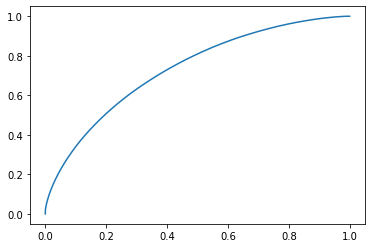

In [36]:
variable = "market_income"
nb_persons = survey_scenario.calculate_variable("number_of_people_per_household", period = year)
weights = survey_scenario.calculate_variable("household_weight", period = year) * nb_persons

y, x = lorenz(survey_scenario.calculate_variable(variable, period = year) / nb_persons, weights = weights)
plt.plot(x, y)

In [37]:
survey_scenario.compute_aggregate('direct_transfers', period = year) / 1e9

0.0

In [38]:
ceq_variables

['agricultural_inputs_subsidies',
 'alimony',
 'all_income_excluding_transfers',
 'autoconsumption',
 'consumable_income',
 'contributions_health',
 'contributions_pensions',
 'corporate_income_tax',
 'customs_duties',
 'decile_consumable_income_per_capita',
 'decile_disposable_income_per_capita',
 'decile_final_income_per_capita',
 'decile_gross_income_per_capita',
 'decile_market_income_per_capita',
 'decile_market_income_plus_pensions_per_capita',
 'decile_survey_income_per_capita',
 'direct_taxes',
 'disposable_income',
 'electricity_subsidies',
 'employee_contributions_health',
 'employee_contributions_pensions',
 'employee_other_contributions',
 'employer_contributions_health',
 'employer_contributions_pensions',
 'employer_other_contributions',
 'excise_taxes',
 'final_income',
 'food_subsidies',
 'fuel_subsidies',
 'gifts_sales_durables',
 'gross_income',
 'imputed_rent',
 'indirect_subsidies',
 'indirect_taxes',
 'market_income',
 'market_income_plus_pensions',
 'net_market_in

In [39]:
survey_scenario.compute_aggregate('customs_duties', period = year) 

21026196716.147133

In [40]:
inflated_survey_scenario = build_ceq_survey_scenario(legislation_country = country, year = year, inflate = True)

In [41]:
sorted([
    variable 
    for variable in survey_scenario.tax_benefit_system.variables 
    if variable.startswith('poste_')
    ])

['poste_10_1_1_1',
 'poste_11_2_1_1',
 'poste_12_1_1_1',
 'poste_12_3_1_1',
 'poste_12_3_2_1_1',
 'poste_12_4_1',
 'poste_12_5_3_1_1',
 'poste_12_5_item_1',
 'poste_12_5_item_2',
 'poste_12_5_item_3',
 'poste_12_6_1_1_1',
 'poste_12_7_1_1_1_item_1',
 'poste_12_7_1_1_1_item_2',
 'poste_1_1_1_1_1',
 'poste_1_1_1_4_1_item_1',
 'poste_1_1_1_4_1_item_2',
 'poste_1_1_1_4_1_item_3',
 'poste_1_1_1_4_3',
 'poste_1_1_2_item_1',
 'poste_1_1_2_item_2',
 'poste_1_1_3_item_1',
 'poste_1_1_3_item_2',
 'poste_1_1_4_item_1',
 'poste_1_1_4_item_2',
 'poste_1_1_5_item_1',
 'poste_1_1_5_item_2',
 'poste_1_1_7_item_1',
 'poste_1_1_7_item_2',
 'poste_1_1_7_item_3',
 'poste_1_1_7_item_4',
 'poste_1_1_8',
 'poste_1_1_9',
 'poste_1_2',
 'poste_2',
 'poste_3_1_2',
 'poste_3_2_1',
 'poste_4_1_1_item_1',
 'poste_4_1_1_item_2',
 'poste_4_3_2_2_1_item_1',
 'poste_4_3_2_2_1_item_2',
 'poste_4_4_1_1_1',
 'poste_4_4_1_2_1',
 'poste_4_5_1_1_1',
 'poste_4_5_2_1_1',
 'poste_4_5_3_1_1',
 'poste_4_5_4_1_1',
 'poste_5_6_2_1

In [42]:
survey_scenario.compute_aggregate('indirect_taxes', period = year)

228614499921.55936

Direct taxes